# Setup
To run this code, you will need [Anaconda Python](https://www.anaconda.com/products/individual#macos) installed and some basic understanding of directory structures and the command line.  Most of the 

1. Develop a basic understanding of the OS X command line.  There are several videos about this topic, some are lengthy.  [This](https://www.youtube.com/watch?v=ftJoIN_OADc) video is reasonably short and provides the basics.
2. There are two commands that are important, the change directory (cd) and launching Jupyter lab (jupyter lab) commands.  In addition, it is sometimes helpful to list your current working directory (pwd) and list the contents of the directory (ls or ls -l).  If you downloaded the contents of this GitHub repository to your Mac OS X desktop, the following commands would change into the correct directory and launch Juputer lab.  Once the Jupuyter lab server is running on the terminal, do not close the terminal.

```command
% cd ~/Desktop/summer_2020_data-master
% jupyter lab
```

3. You should have a browser opened by entering the `jupyter lab` command (above) and then you can double click on the analysis_lesson_01.ipynb file.
4. Using the code cells below, you should be able to press *shift+enter* to run a cell.  For example, if you had the code below in a cell, as you do in the cell following this, you could press *shift+enter* and it would store a string in something called *str_val), print the value as output, and then print the lowercase version of the same value as output.

```python
str_val = 'HELLO WORLD!'
print(str_val)
print(str_val.lower())
```

In [1]:
str_val = 'HELLO WORLD!'
print(str_val)
print(str_val.lower())

HELLO WORLD!
hello world!


# Introduction
The dataset for this project was taken from the [Lego Dataset on Kaggle](https://www.kaggle.com/rtatman/lego-database).  It would be worthwhile to look at this dataset and the Kaggle site to collect some background information.

As you might have noticed, there is a directory called **data** in the same folder as this notebook.  Within this directory there are a series of CSV files.  If you would like some background on CSV files, you can find information on the [comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) Wikipedia page.  This is a common data storage format for storing row-type data, similar to a database.  In fact, the CSV files are actually from a database and our first task is going to be recreating parts of that database using the diagram below.

The data structure for this dataset is detailed by this database diagram.  Take a look at the diagram and see if you can find the table called 'sets'.  Does the 'sets' table connect to anything?

![Database Scheme](./data/downloads_schema.png)

## Setup
To get started, we are going to need a package from the Anaconda distribution that will help us read and manipulate the data.  A common tool to perform this is a package called [pandas](https://pandasguide.readthedocs.io/en/latest/) - there is a lot of technical information on this site, but it can be useful for examples.  To start, we are going to bring the pandas package into the Jupyter environment, so we can use it.  In addition, we also give it a short name - this is like a nickname, and in the case of pandas we give it a nickname of 'pd'.

In [2]:
import pandas as pd

We also will want to generate some basic plots of the data, this allows us to visually see information about the data.  To accomplish this we use a neat feature of Jupyter called magic commands.  You can read all about these [magic commands](https://pandasguide.readthedocs.io/en/latest/).  The line below allows us to produce plots inline within the Jupyter notebook.

In [3]:
%matplotlib inline

## First Data File: Lego Sets
The command below reads in the first CSV file.  As noted above, the goal is to read in the CSV files named 'sets.csv' from the data directory.  It is worthwhile to note, the '.' at the beginning of the path means "starting from the current directory", the remaining directory commands can be interpreted as English.  So, beginning from the current directory ('.'), look in the folder data ('/data'), find a file names sets.csv.  The command ```pd.read_csv('./data/sets.csv')``` performs the command from Pandas to read a CSV file, which is like opening it on your comnputer.

After the file is read by Pandas, it is stored to a variable named ```df_sets```, which would be called a Pandas dataframe.  Finally, the shape of the dataframe is printed.  It shows that the file sets has 11,673 rows and 5 columns.  In addition, we could also ask for the column names and a preview of the first five rows of data; the next two cells show that code.

In [4]:
df_sets = pd.read_csv('./data/sets.csv')
print(df_sets.shape)

(11673, 5)


The code below prints a neat list fo the column names.  The call to the ```columns``` attribute returns a list, which we can print by joining together with a command a space between each item - this is called concatenation.

In [5]:
', '.join(df_sets.columns)

'set_num, name, year, theme_id, num_parts'

When we ask for the first few rows of data, it allows us to see the structure of the data.  What could you say about the two sets shown in the first five rows of data from the year 1979?  How many parts did each one have?  What theme do you think they belonged to (city, pirates, space, something else)?

In [6]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


## Basic Plots
The code below takes the Lego sets dataframe and starts to explore the data using a graphical approach.  Sometimes this is helpful as it allows us to look across all of the data to understand how it looks.  Since the sets dataframe has over 11,0000 rows, there are far too many to look at manuall (one by one), so we have to aggregate and visualize the content in a meaningful way.  One tool to accomplish this is plotting, so we can get an sense of what the data contains in a picture without reviewing each row.  The plot below produces a plot called a histogram, which you can read about [here](https://en.wikipedia.org/wiki/Histogram).  A histogram is a way to show a count of the number of items, usually by creating "bins" or "buckets" or number ranges and counting.  For instance, if we wanted to look at the *num_parts* field we could create a plot that has 100 bins, then we would count the number of sets that have between the start and end values for a single bin.  For example, if we had a minimum value of 0 and a maximum value of 100 and a bin width of 10, we would have

${range} = {maximum}-{minimum} = 100-0 = 100$

and then divide the total range by the number of bins, so

${bin width} = 100/10 = 10$

This would produce a first bin from 0 to 10, and we would count the number of sets that have between 0 and 10 parts.  These ranges, such as 0 to 10, are called the bins or buckets.  At the end, we produce a bar graph of the count for each of the "bins".  The single line of code below performs all of this for us and produces a figure.  Try adjust the number of bins and the figure size...

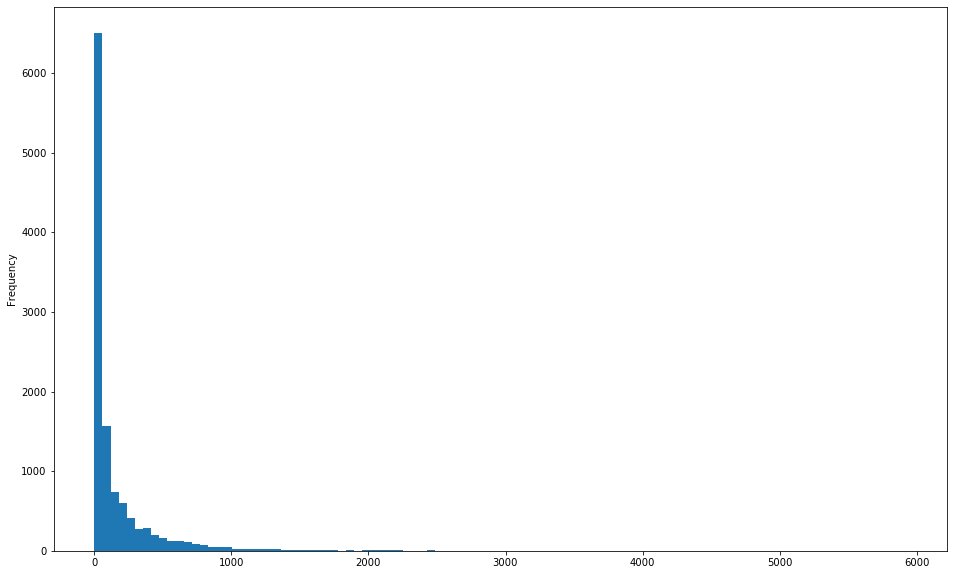

In [7]:
df_sets['num_parts'].plot.hist(figsize=(16,10),bins=100)

## Second Data File: Lego Themes
One of the columns you might have noticed about the Lego sets file is there is a column called *theme_id*.  This seems like a column that should be more than just a number - they must have something more than a number for a theme, so they can call things part of a theme people would recognize, such as the City theme or the Space theme.  If we look at that data scheme file again, you will see that the *theme_id* column is tied to another CSV file (table) called 'themes.csv'.  Well, the data scheme picture shows that sets is tied to themes by *theme_id*, and it just so happens that there is a file called 'themse.csv' under the data directory.  So, our goal is read in this second file and produce some information similar to the sets file.

![Database Scheme](./data/downloads_schema.png)

The command below reads in the CSV file using the command ```pd.read_csv('./data/themese.csv')```.  After the file is read by Pandas, it is stored to a variable named ```df_themes``` as a Pandas dataframe.  Finally, the shape of the dataframe is printed.  It shows that the file sets has 614 rows and 3 columns.  This means that throughout the course of Lego products there have been 614 themes.  That is a lot of themes.

In [8]:
df_themes = pd.read_csv('./data/themes.csv')
print(df_themes.shape)

(614, 3)


In [9]:
', '.join(df_themes.columns)

'id, name, parent_id'

In [10]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Sometimes you want to be able to find something within a dataframe to filter or check it.  For example, if we wanted to know all of the space themes we would probably look through all of the values in the name column and identify any that contain the word 'space'.  Using the computer we could search this column with the word 'space', but we would want to make sure we catch all the values of space regardless if it is spelled 'Space', 'space', 'SPACE', 'SpAce', or some variant.  Look at the results below and see if you can find the difference between the two commands.  One produces zero matching rows and the other produces nine.

In [11]:
df_themes.loc[df_themes['name'].str.contains('space',case=True)]

,id,name,parent_id


In [12]:
df_themes.loc[df_themes['name'].str.contains('space',case=False)]

,id,name,parent_id
92,93,Space Port,50.0
125,126,Space,NaN
129,130,Classic Space,126.0
138,139,Space Police I,126.0
139,140,Space Police II,126.0
140,141,Space Police III,126.0
421,422,Space,411.0
451,452,Space,443.0
526,527,Space,507.0


## Merging
It turns out the sets table and the themes table can actually be joined together, so you would be able to read one row and know a Lego set and identify which theme it belongs to.  This is exactly what the diagram above shows for the data scheme.  In particular, the sets table and the themese table are joined together or merged.  The command below performs this function for us with the input of the two datadframe and which columns should be matched together.  In this case, we are matching the *theme_id* from the sets dataframe and the *id* from the themes dataframe.

If they designed these tables correctly, the themes dataframe should contain all of the different types of values within the *theme_id* column from the sets table.  So, we should end up with the same number of rows in the merged dataframe as there were in the sets dataframe, which was 11,673 rows.  Since we are merging together two dataframes, we will have more columns.

In [13]:
df_merged_sets_themes = pd.merge(left=df_sets,right=df_themes,left_on='theme_id',right_on='id',how='inner')
print(df_merged_sets_themes.shape)

(11673, 8)


In [14]:
', '.join(df_merged_sets_themes.columns)

'set_num, name_x, year, theme_id, num_parts, id, name_y, parent_id'

In [15]:
df_merged_sets_themes.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0


## Next Steps
How would you read in the inventory_sets table and merge it with the ```df_merged_sets_themes``` dataframe produced in the previous step?  Remember, the first step is to read it in.  The second step would be to find where the inventory_sets table merges with the sets table, which is now called ```df_merged_sets_themes```.

In [16]:
# Step 1: Read in the file from the data directory called inventory_sets.csv.


In [17]:
# Step 2: Using a very similar command as the one in the merging section above, merge the two dataframes together.
